In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
#plt.style.us('fivethirtyeight')
df=pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv',parse_dates=['Date'])
df.head()


,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [122]:
#df['Total Case']=df[['Confirmed','Recovered','Deaths']].sum(axis=1)
df['Active Case']=df['Confirmed']-df['Recovered']


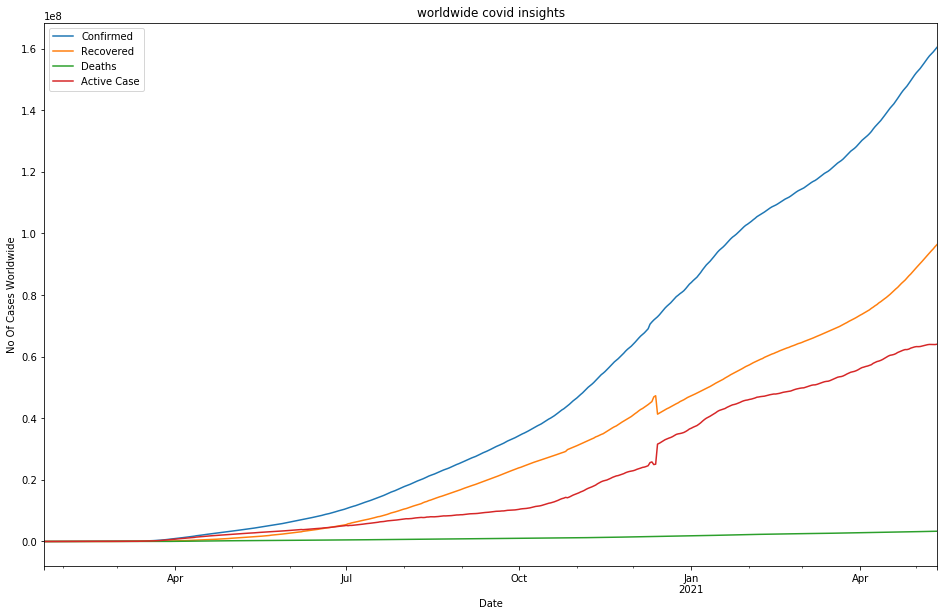

In [123]:
#world wide cases
worldwide_df=df.groupby(['Date']).sum()
w=worldwide_df.plot(figsize=(16,10))
w.set_xlabel('Date')
w.set_ylabel('No Of Cases Worldwide')
w.title.set_text('worldwide covid insights')
plt.show()

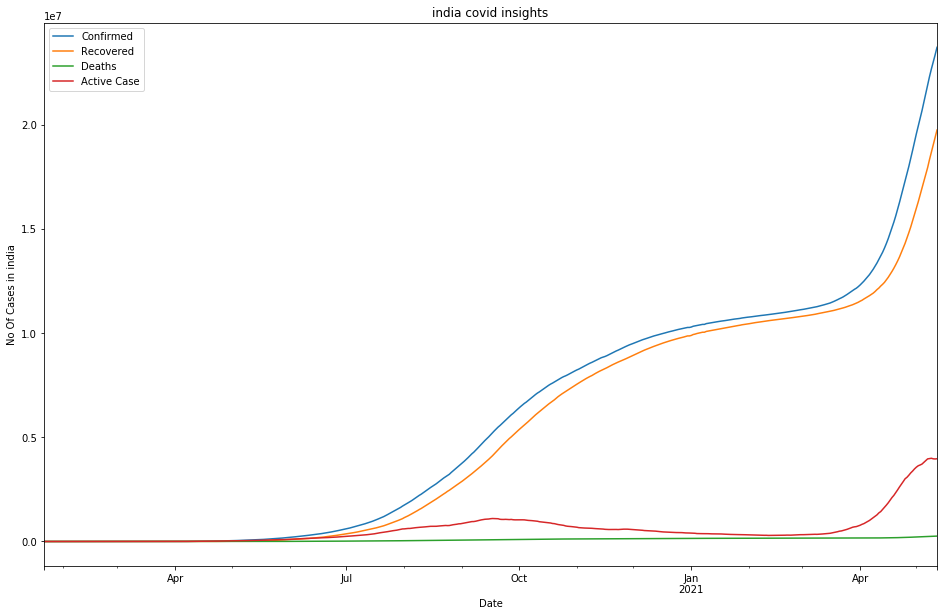

In [124]:
#india cases
idf=df[df['Country']=='India']
india_df=idf.groupby(['Date']).sum()
w=india_df.plot(figsize=(16,10))
w.set_xlabel('Date')
w.set_ylabel('No Of Cases in india')
w.title.set_text('india covid insights')
plt.show()

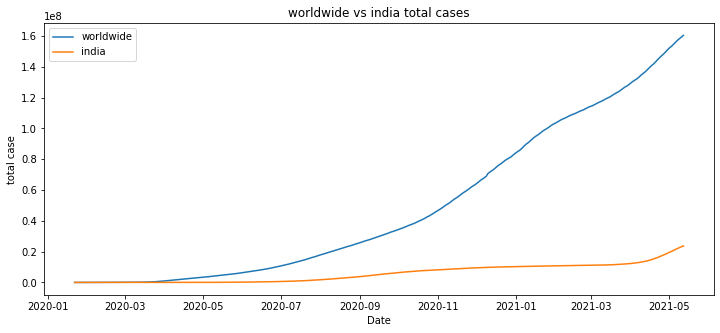

In [125]:
idf=df[df['Country']=='India']
india_df=idf.groupby(['Date']).sum()
fig=plt.figure(figsize=(12,5))
ax=fig.add_subplot(111)
ax.plot(worldwide_df[['Confirmed']],label='worldwide')
ax.plot(india_df[['Confirmed']],label='india')
ax.set_xlabel('Date')
ax.set_ylabel('total case')
ax.title.set_text('worldwide vs india total cases')
plt.legend(loc='upper left')
plt.show()


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


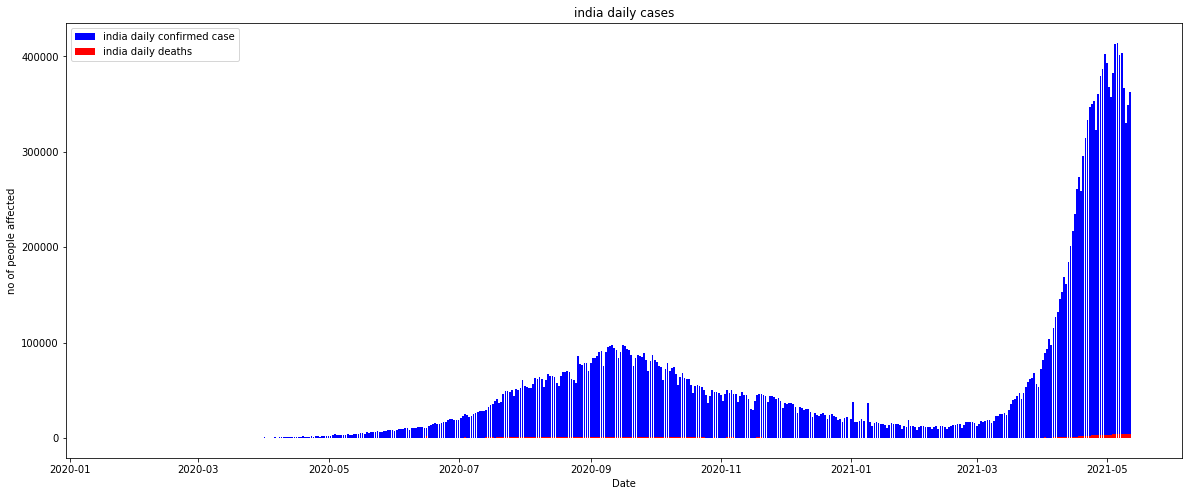

In [126]:

#india_df=india_df.reset_index()
#india_df.head()
idf['daily confirmed']=idf['Confirmed'].sub(idf['Confirmed'].shift())
idf['daily deaths']=idf['Deaths'].sub(idf['Deaths'].shift())
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(111)
ax.bar(idf['Date'],idf['daily confirmed'],color='b',label='india daily confirmed case')
ax.bar(idf['Date'],idf['daily deaths'],color='r',label='india daily deaths')
ax.set_xlabel('Date')
ax.set_ylabel('no of people affected')
ax.title.set_text('india daily cases')
plt.legend(loc='upper left')
plt.show()


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


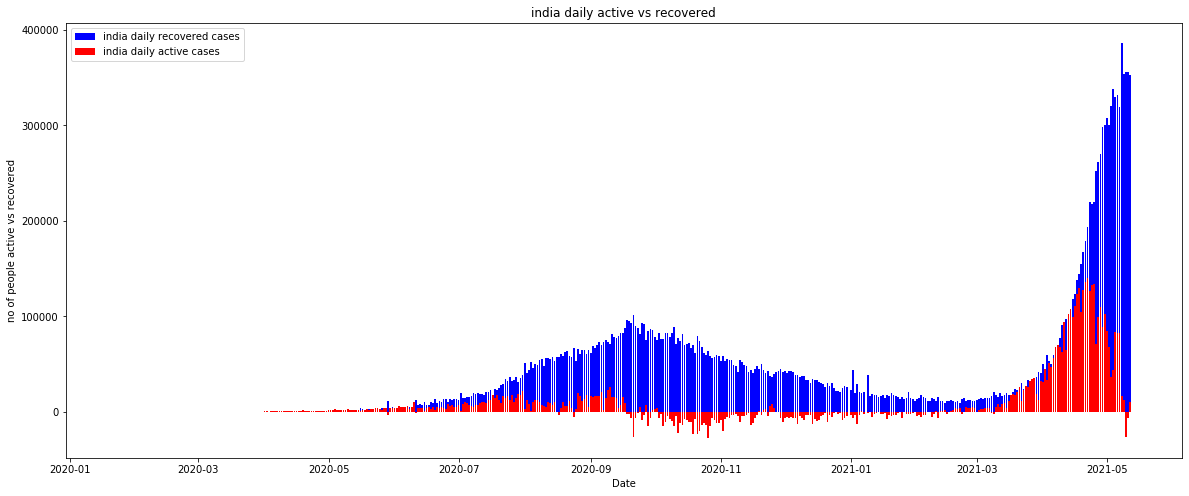

In [133]:
idf['daily recovered']=idf['Recovered'].sub(idf['Recovered'].shift())
idf['daily active']=idf['Active Case'].sub(idf['Active Case'].shift())
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(111)
ax.bar(idf['Date'],idf['daily recovered'],color='b',label='india daily recovered cases')
ax.bar(idf['Date'],idf['daily active'],color='r',label='india daily active cases')
ax.set_xlabel('Date')
ax.set_ylabel('no of people active vs recovered')
ax.title.set_text('india daily active vs recovered')
plt.legend(loc='upper left')
plt.show()

In [127]:
import time
from datetime import date,timedelta,datetime
yesterday=date.today()-timedelta(days=1)
yesterday.strftime('%Y-%m-%d')
element=datetime.combine(yesterday, datetime.min.time())
today_df=df[df['Date']==element]
top_10=today_df.sort_values(['Confirmed'],ascending=False)[:10]
top_10


,Date,Country,Confirmed,Recovered,Deaths,Active Case
85382,2021-05-12,US,32814415,0,583684,32814415
38159,2021-05-12,India,23703665,19734823,258317,3968842
11447,2021-05-12,Brazil,15359397,13622419,428034,1736978
30050,2021-05-12,France,5882882,375465,107280,5507417
84905,2021-05-12,Turkey,5072462,4801291,43821,271171
68210,2021-05-12,Russia,4849044,4466782,112410,382262
87290,2021-05-12,United Kingdom,4457742,15158,127901,4442584
41021,2021-05-12,Italy,4131078,3655112,123544,475966
77750,2021-05-12,Spain,3592751,150376,79208,3442375
31958,2021-05-12,Germany,3564494,3233630,85451,330864


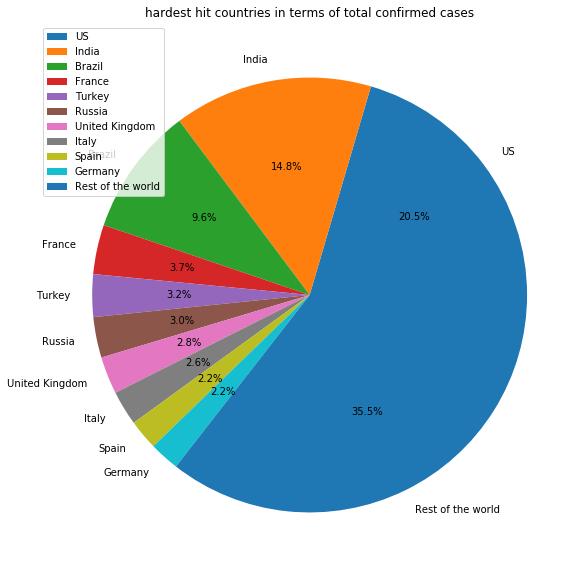

In [128]:
top_10.loc['rest of the world']=today_df.sort_values(['Confirmed'],ascending=False)[10:].sum()
top_10.loc['rest of the world','Country']='Rest of the world'
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.pie(top_10['Confirmed'],labels=top_10['Country'],autopct='%1.1f%%')
ax.title.set_text('hardest hit countries in terms of total confirmed cases')
ax.legend(loc='upper left')
plt.show()

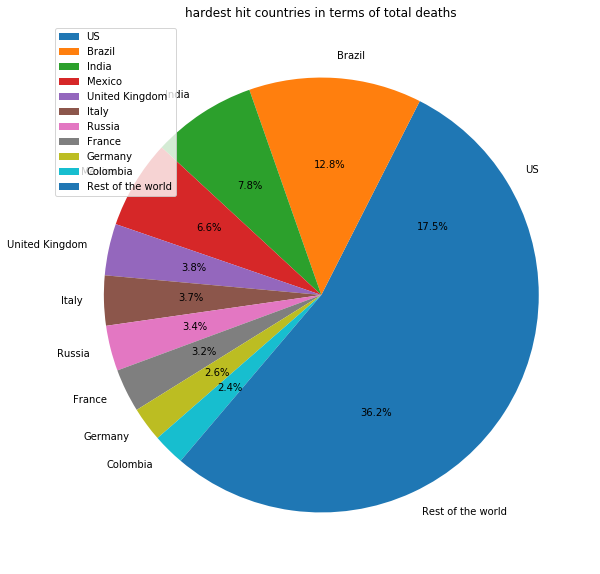

In [129]:
top_10=today_df.sort_values(['Deaths'],ascending=False)[:10]
top_10.loc['rest of the world']=today_df.sort_values(['Deaths'],ascending=False)[10:].sum()
top_10.loc['rest of the world','Country']='Rest of the world'
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.pie(top_10['Deaths'],labels=top_10['Country'],autopct='%1.1f%%')
ax.title.set_text('hardest hit countries in terms of total deaths')
ax.legend(loc='upper left')
plt.show()

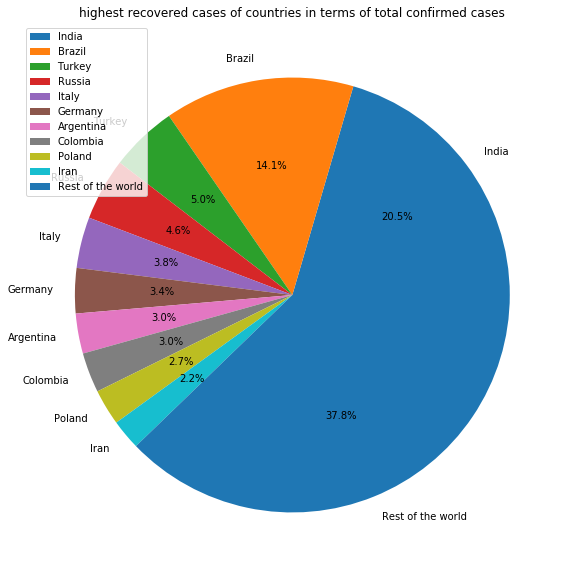

In [130]:
top_10=today_df.sort_values(['Recovered'],ascending=False)[:10]
top_10.loc['rest of the world']=today_df.sort_values(['Recovered'],ascending=False)[10:].sum()
top_10.loc['rest of the world','Country']='Rest of the world'
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.pie(top_10['Recovered'],labels=top_10['Country'],autopct='%1.1f%%')
ax.title.set_text('highest recovered cases of countries in terms of total confirmed cases')
ax.legend(loc='upper left')
plt.show()